# Example Notebook

The following notebook presents the workflow and functions required for segmentation and classification of nano-CT Li-ion X-ray CT datasets.

For this iteration, Mask R-CNN **must** be previously installed but future updates could include the package. This example is running on Keras 1.1.2 and GPU enabled Tensorflow 2.2.0.

In [1]:
import eilnn
#import numpy as np
#import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
#from mrcnn import utils
#from mrcnn import visualize
#from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
from samples import particles
#import sys

import tensorflow as tf

# Mask R-CNN Model Initailisation

The first step consists in initialising the Mask R-CNN model with the preferred settings. We are loading the weights obtained with training the Mask R-CNN as outlined in the main manuscript. These can be found on *link?*

In [2]:
config = particles.ParticlesConfig()
#subset = 'pristine_abs_3'
ROOT_DIR = os.path.abspath('C:/Users/Sohrab/Documents/crack/EILNet_tf2/')
#sys.path.append(ROOT_DIR)
#PARTICLE_DIR = os.path.join(ROOT_DIR, 'images',subset)

class InferenceConfig(config.__class__):
    GPU_COUNT = 1
    IMAGES_PER_GPU =1
    IMAGE_RESIZE_MODE = 'square'
    IMAGE_MIN_DIM = 768
    IMAGE_MAX_DIM = 1024
    LEARNING_RATE = 0.0001
    LEARNING_MOMENTUM = 0.9
    USE_MINI_MASK = False
    BATCH_SIZE=1
    VALIDATION_STEPS = 100
    NUM_CLASSES = 2
    
config_inference= InferenceConfig()
DEVICE = '/GPU:0'
TEST_MODE = 'inference'

with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode='inference', config = config_inference, model_dir = 'C:/Users/Sohrab/Documents/crack/EILNet_tf2/logs')
    
model.load_weights(os.path.join(ROOT_DIR, 'C:/Users/Sohrab/Documents/crack/EILNet_tf2/logs/particles20220401T1334/mask_rcnn_particles_0450.h5'), by_name=True)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Re-starting from epoch 450


# Set Directories
Indicate path where grayscale data for analysis and classifier model are located.

In [3]:
grayscale_dir = 'C:/Users/Sohrab/Documents/crack/EILNet_tf2/images/pristine_abs_3'
model_class = 'C:/Users/Sohrab/Documents/crack/eil-nn/model_binary'

The **segment_classify()** function is called to run the segmentation and classification. The arguments required are:
**model** = the Mask R-CNN model initialised previously

**grayscale_dir** = path to the grayscale images

**model_class** = path to the pre-trained classifier model (provided in repo?)

**marker_size** = watershed marker size

**export_path (optional)** = if provided, the invidiual particle segmentations will be saved in the desired path

Loading images in: C:/Users/Sohrab/Documents/crack/EILNet_tf2/images/pristine_abs_3
Stack Dimensions  (201, 690, 603, 3)
Label array size(201, 690, 603)



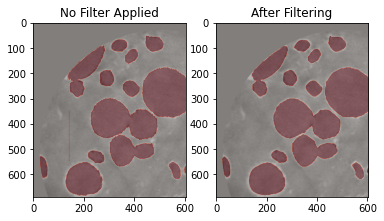

Distance Transform Completed
Extended Minima Found
Watershed Separation Completed
Segmentation took 12.5 minutes


OSError: SavedModel file does not exist at: C:/Users/Sohrab/Documents/crack/eil-nn/model_binary/{saved_model.pbtxt|saved_model.pb}

In [4]:
eilnn.segment_classify(model, grayscale_dir, model_class, marker_size=8)